In [2]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (182 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [3]:
!pip install pdf2image
!pip install PyPDF2
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 189 kB 8.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 17 kB/s 
     |████████████████████████████████| 47.6 MB 1.3 MB/s 


In [71]:
from pdf2image import convert_from_path
import PyPDF2
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [72]:
reader = easyocr.Reader(['en'])

In [73]:
images = convert_from_path('resume.pdf')

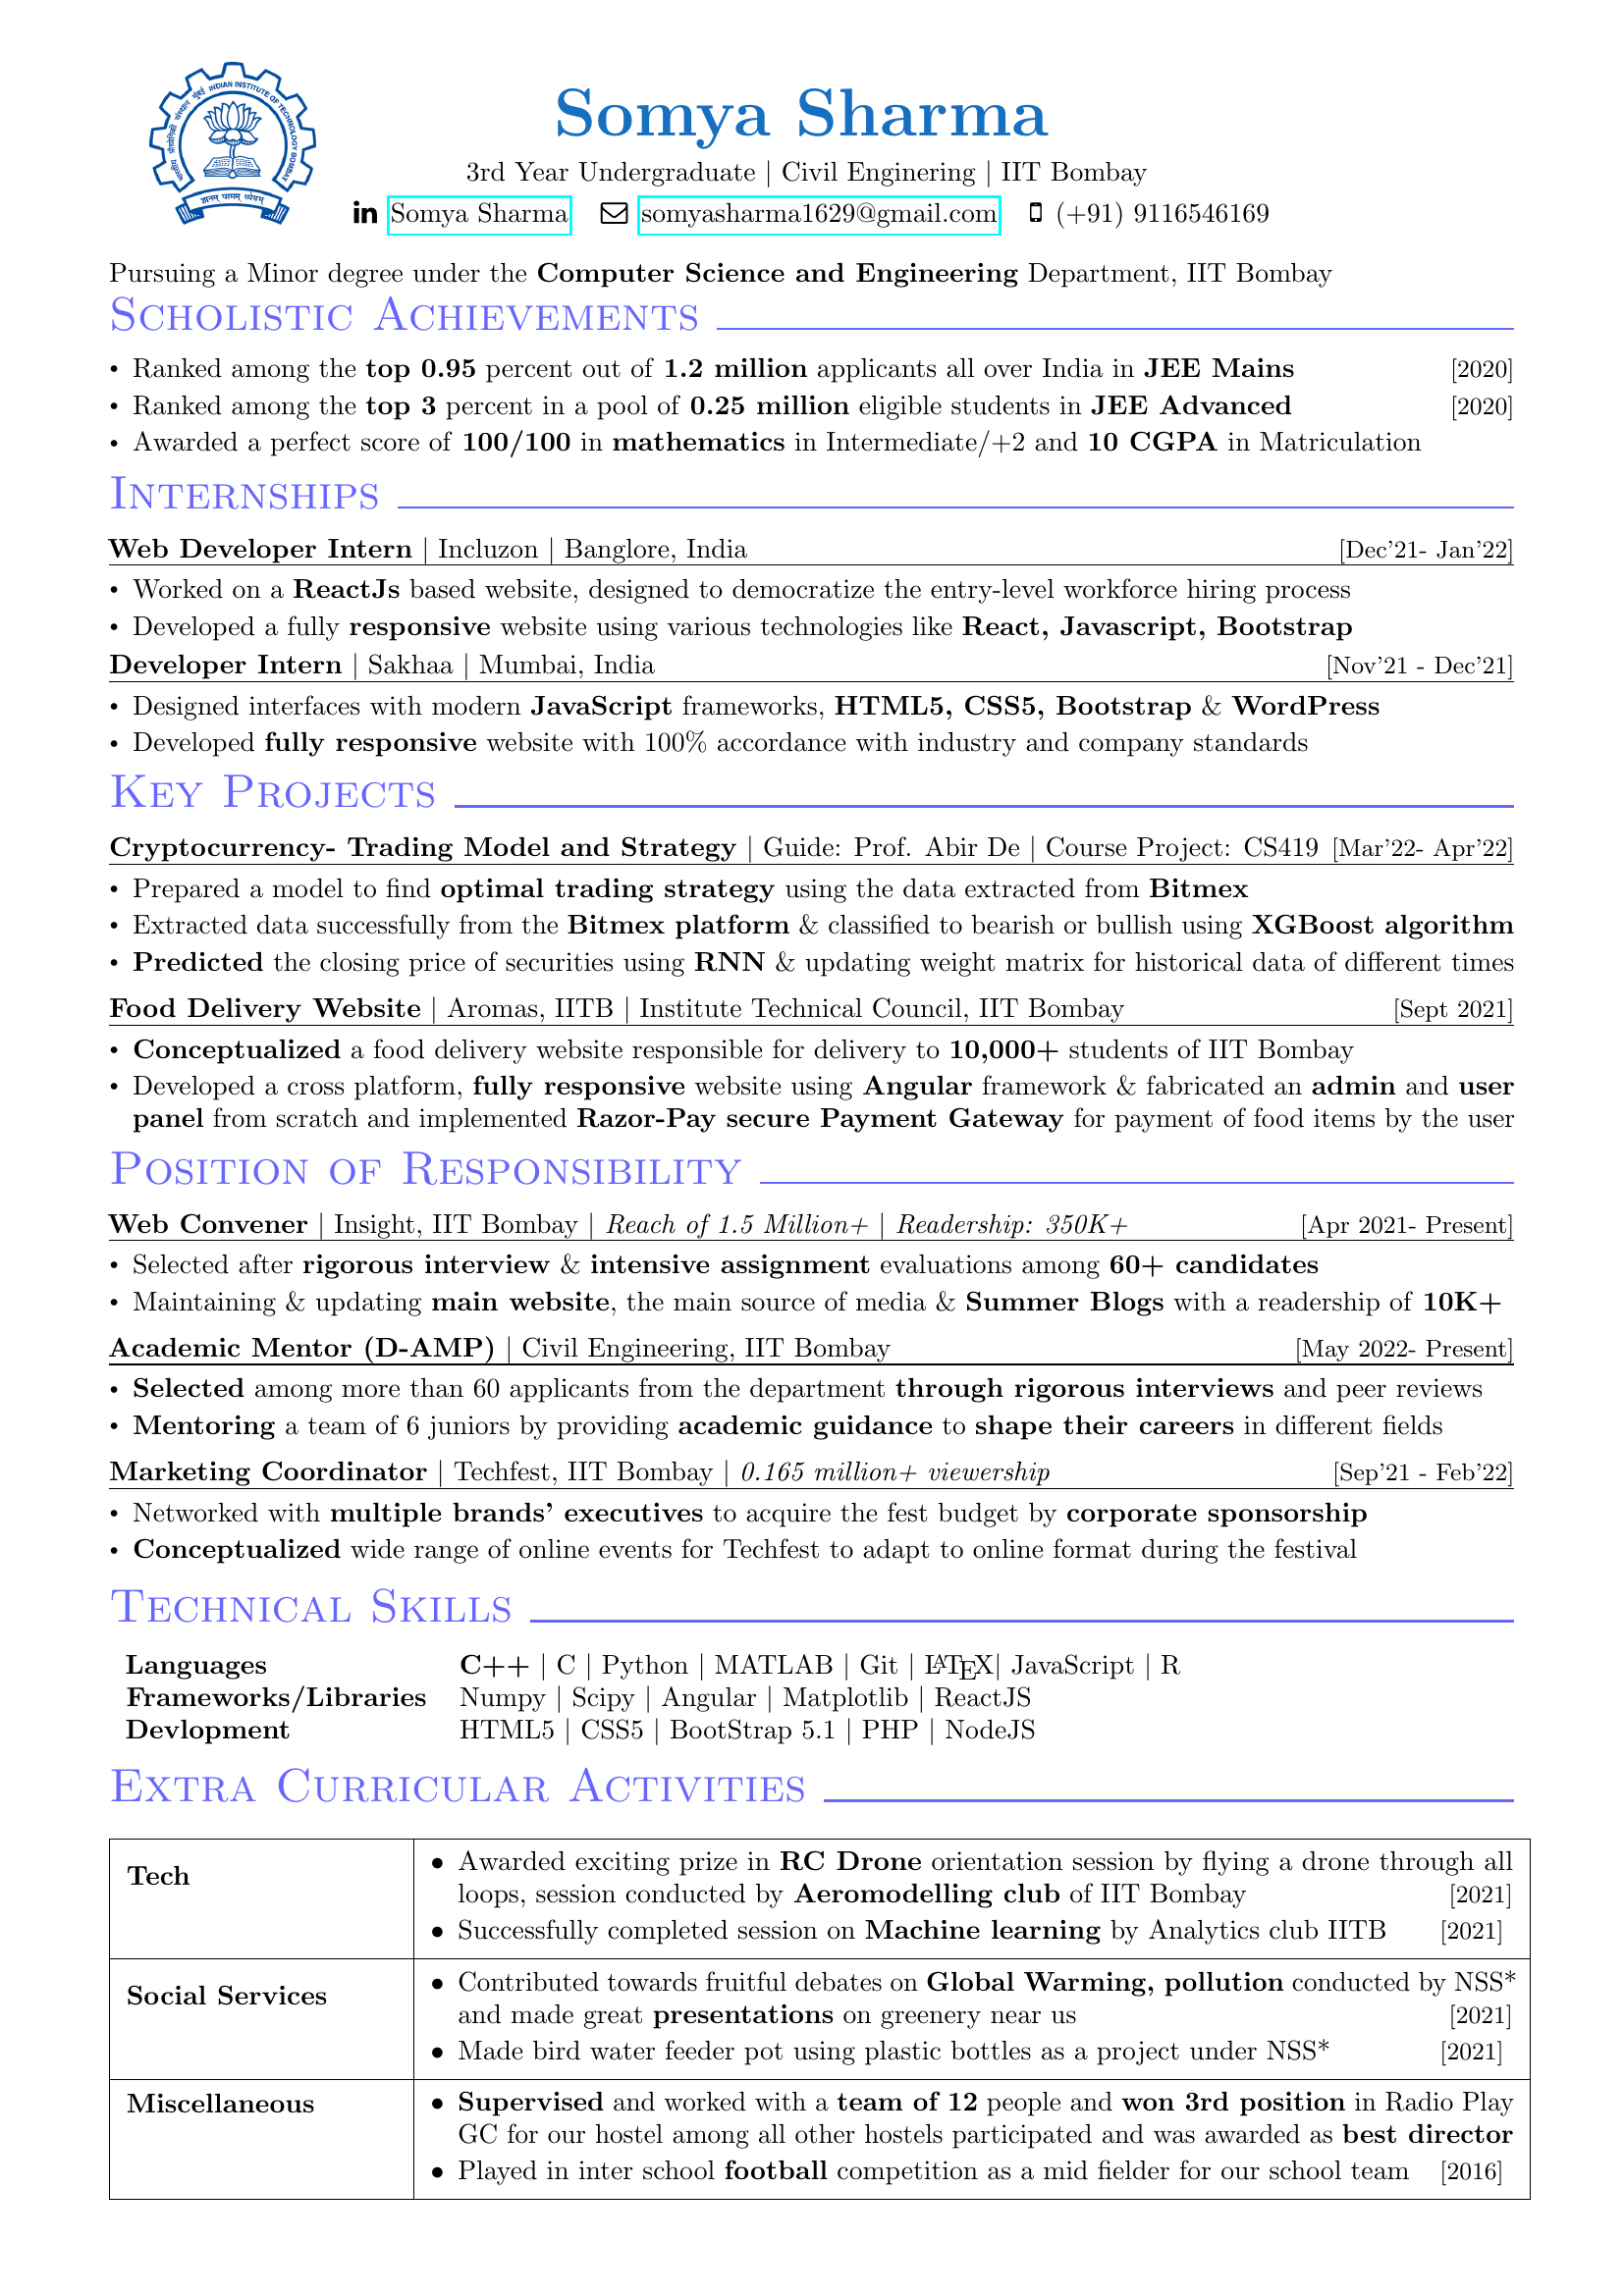

In [74]:
from IPython.display import display, Image
pdfFileObj = open('resume.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
num_pages=pdfReader.numPages
for i in range(num_pages):
  display(images[i])


In [155]:
if num_pages>1 :
  bound = []
  b= []
  for i in range(num_pages):
    t= bound.append(reader.readtext(np.array(images[i]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10))
    b.append(t)
  bounds= b[0]+b[1]
else:
  bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[211, 75], [278, 75], [278, 102], [211, 102]],
  'aoian stiure',
  0.08692897358716892),
 ([[555, 77], [1077, 77], [1077, 165], [555, 165]],
  'Somya Sharma',
  0.9902549103903132),
 ([[472, 162], [773, 162], [773, 193], [472, 193]],
  '3rd Year Undergraduate',
  0.7619298530117343),
 ([[794, 164], [998, 164], [998, 194], [794, 194]],
  'Civil Enginering',
  0.9903844244661592),
 ([[1015, 157], [1173, 157], [1173, 193], [1015, 193]],
  "IT' Bombay",
  0.631684662146939),
 ([[204, 198], [246, 198], [246, 206], [204, 206]],
  'UA 44',
  0.09237432815724611),
 ([[245, 194], [272, 194], [272, 210], [245, 210]], 'E', 0.445726257898059),
 ([[355, 200], [583, 200], [583, 236], [355, 236]],
  'in Somya Sharma',
  0.823570936837547),
 ([[648, 199], [1019, 199], [1019, 239], [648, 239]],
  'somyasharmal629@gmail.com',
  0.922851835445882),
 ([[1071, 201], [1299, 201], [1299, 237], [1071, 237]],
  '(+91) 9116546169',
  0.9987929684935467),
 ([[106, 259], [1361, 259], [1361, 300], [106, 300]],


In [8]:
# if (bounds[11][1]=='SCHOLISTIC ACHIEVEMENTS'):
#   print("Yes")
# else: print("NO")  

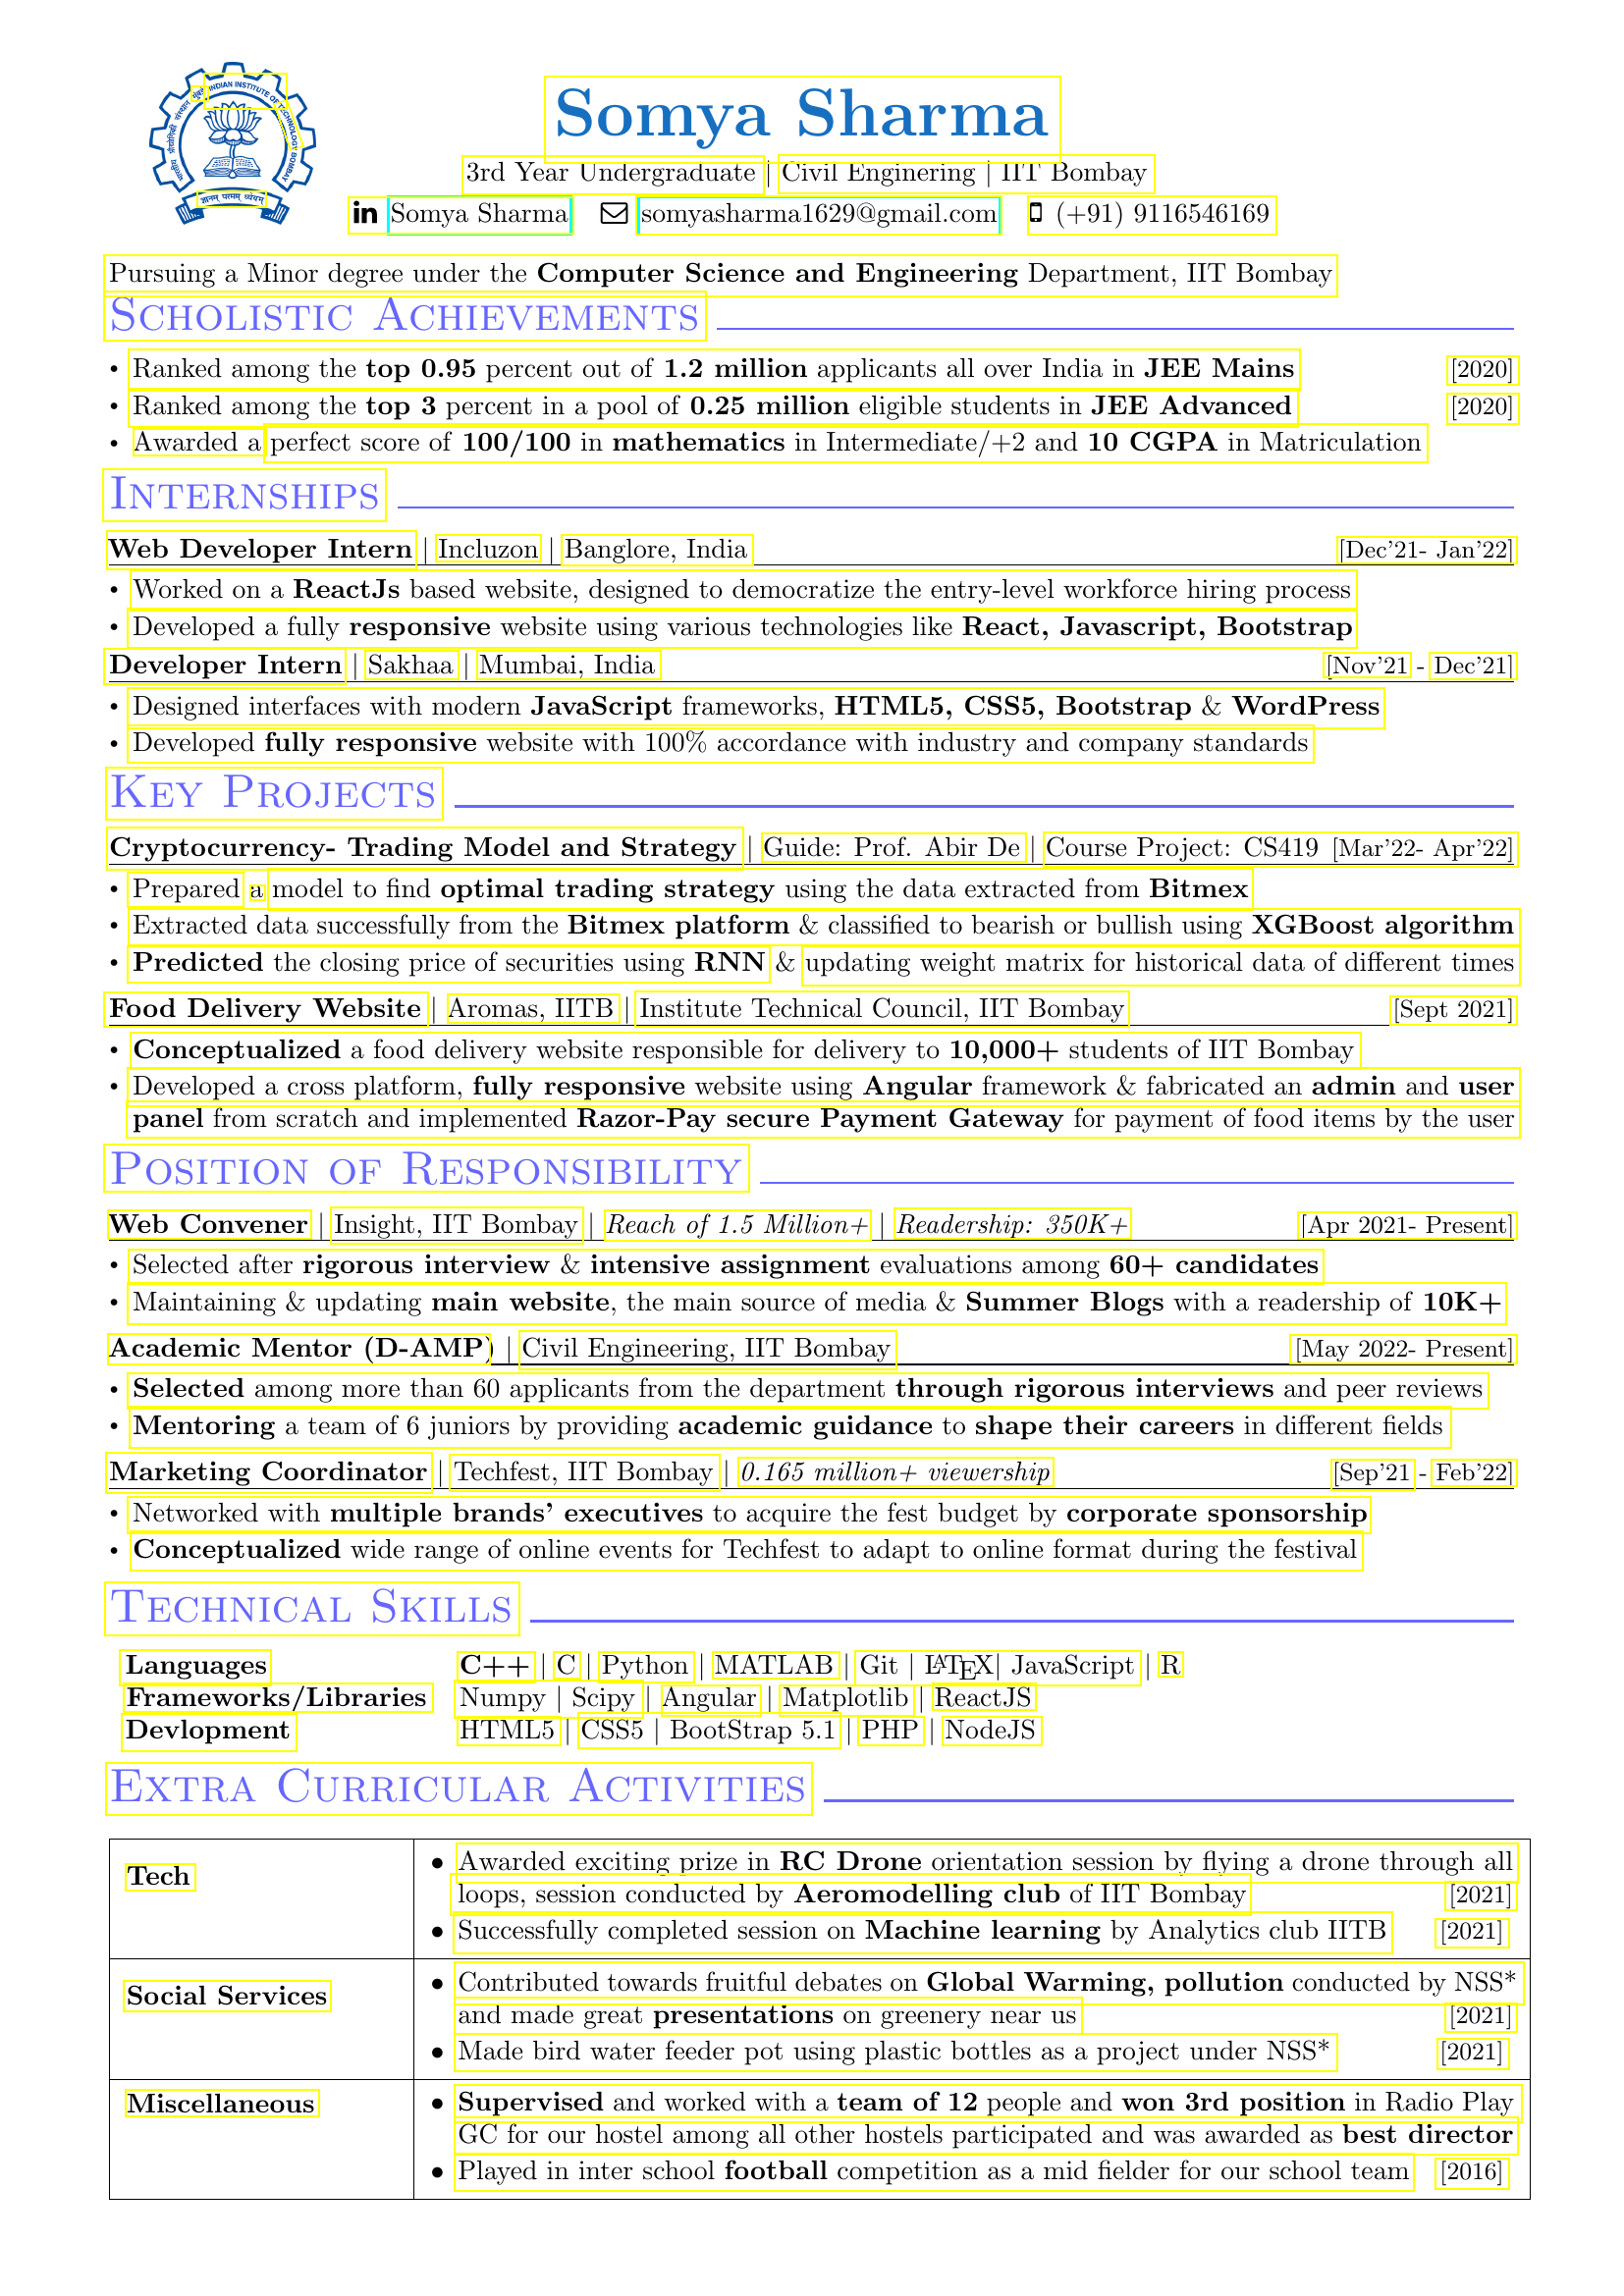

In [76]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(images[0], bounds)

In [77]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

1
37r
Somya Sharma
3rd Year Undergraduate
Civil Enginering | IIT Bombay
4 FH%n
in Somya Sharma
somyasharmal629@gmail.com
0 (+91) 9116546169
Pursuing a Minor degree under the Computer Science and Engineering Department, IIT Bombay
SCHOLISTIC  ACHIEVEMENTS
Ranked among the top 0.95 percent out of 1.2 million applicants all over India in JEE Mains
[2020]
Ranked among the top 3 percent in a pool of 0.25 million eligible students in JEE Advanced
[2020]
Awarded a
perfect score of 100/100 in mathematics in Intermediate/+2 and 10 CGPA in Matriculation
INTERNSHIPS
Web_Developer_Intern
Incluzon
Banglore, India
[Dec 21- Jan'22]
Worked on a ReactJs based website, designed to democratize the entry-level workforce hiring process
Developed a fully responsive website using various technologies like React, Javascript, Bootstrap
Developer_Intern
Sakhaa
Mumbai , India
[Nov'21
Dec 21]
Designed interfaces with modern JavaScript frameworks, HTMLS, CSSS, Bootstrap & WordPress
Developed fully responsive websi

In [78]:
import pandas as pd

In [79]:
df = pd.DataFrame(bounds, columns =['Coordinates', 'Text', '% Surety'])
df

,Coordinates,Text,% Surety
0,"[[195, 87], [211, 87], [211, 103], [195, 103]]",1,0.289347
1,"[[208, 74], [291, 74], [291, 111], [208, 111]]",37r,0.003780
2,"[[555, 77], [1079, 77], [1079, 166], [555, 166]]",Somya Sharma,0.999626
3,"[[471, 158], [777, 158], [777, 198], [471, 198]]",3rd Year Undergraduate,0.872282
4,"[[793, 157], [1175, 157], [1175, 197], [793, 1...",Civil Enginering | IIT Bombay,0.687179
...,...,...,...
100,"[[463, 2123], [1549, 2123], [1549, 2162], [463...",Supervised and worked with a team of 12 people...,0.869330
101,"[[463, 2156], [1545, 2156], [1545, 2195], [463...",GC for ou1 hostel among all other hostels part...,0.762668
102,"[[463, 2193], [1439, 2193], [1439, 2232], [463...",Played in inter school football competition as...,0.731604
103,"[[1462, 2198], [1536, 2198], [1536, 2230], [14...",[2016],0.823291


In [80]:
heading_widths= []
for i in range(6,len(bounds)):
  heading_widths.append((bounds[i][0][3][1]-bounds[i][0][0][1]))
heading_widths= np.unique(heading_widths)
heading_widths

array([16.        , 26.        , 28.        , 30.        , 32.        ,
       36.        , 37.        , 38.        , 39.        , 40.        ,
       41.        , 42.        , 43.        , 44.        , 48.95532178,
       49.        , 51.        , 54.        , 55.        ])

In [81]:
width_max= heading_widths[len(heading_widths)-1]
width_max

55.0

In [83]:
max_heading1= []
for i in range(6,len(bounds)-6):
  width= (bounds[i][0][3][1]-bounds[i][0][0][1])
  if (width<=width_max and width>(width_max-8)):
    max_heading1.append(bounds[i][1])
max_heading1

['SCHOLISTIC  ACHIEVEMENTS',
 'INTERNSHIPS',
 'KEY PROJECTS',
 'PoSITION OF RESPONSIBILITY',
 'TECHNICAL SKILLS',
 'ExTRA CURRICULAR ACTIVITIES']

In [102]:
flag= []
for j in range(len(max_heading1)):
  for i in range(len(bounds)):
    if (bounds[i][1]==max_heading1[j]):
      flag.append(i+1)
flag 

[11, 18, 32, 49, 69, 87]

In [103]:
sub_width=0
sub_maxwidths= []
for j in range(1,len(flag)):
  for i in range(flag[j-1],flag[j]-1):
    width= (bounds[i][0][3][1]-bounds[i][0][0][1])
    if width>sub_width:
      sub_width=width
  sub_maxwidths.append(sub_width)
sub_maxwidths

[43, 43, 44, 44, 44]

In [153]:
sub_head= []
for j in range(1,len(flag)):
  sub_headings= []
  for i in range(flag[j-1],flag[j]):
    length= (bounds[i+1][0][1][0]-bounds[i+1][0][0][0])
    if (length<=(sub_maxwidths[j-1])*7 and length>=((sub_maxwidths[j-1]))):
      sub_headings.append(bounds[i][1])
  sub_head.append(sub_headings)    
sub_head.append(0)   
sub_head

[['Ranked among the top 0.95 percent out of 1.2 million applicants all over India in JEE Mains',
  'Ranked among the top 3 percent in a pool of 0.25 million eligible students in JEE Advanced',
  '[2020]',
  'perfect score of 100/100 in mathematics in Intermediate/+2 and 10 CGPA in Matriculation'],
 ['Web_Developer_Intern',
  'Incluzon',
  'Banglore, India',
  'Developed a fully responsive website using various technologies like React, Javascript, Bootstrap',
  'Developer_Intern',
  'Sakhaa',
  'Mumbai , India',
  "[Nov'21"],
 ['Cryptocurrency-Trading Model and Strategy',
  'Course_Project:_CS419_[Mar 22_Apr22]',
  'Food Delivery Website',
  'Institute_Technical Council_IIT Bombay',
  'PoSITION OF RESPONSIBILITY'],
 ['Web Convener',
  'Insight_IIT Bombay',
  'Reach of 1.5 Million +',
  'Readership: 350K+',
  'Civil Engineering_IIT Bombay',
  'Marketing _Coordinator',
  '0.165 million + viewership',
  "[Sep'21",
  'TECHNICAL SKILLS'],
 ['Languages',
  'C',
  'Python',
  'MATLAB',
  'Fram

In [154]:
table = {}
for idx,val in enumerate(max_heading1):
  table[val]= sub_head[idx]
pd.Series(table)

SCHOLISTIC  ACHIEVEMENTS       [Ranked among the top 0.95 percent out of 1.2 ...
INTERNSHIPS                    [Web_Developer_Intern, Incluzon, Banglore, Ind...
KEY PROJECTS                   [Cryptocurrency-Trading Model and Strategy, Co...
PoSITION OF RESPONSIBILITY     [Web Convener, Insight_IIT Bombay, Reach of 1....
TECHNICAL SKILLS               [Languages, C, Python, MATLAB, Frameworks /Lib...
ExTRA CURRICULAR ACTIVITIES                                                    0
dtype: object